In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__)

4.4.0


In [56]:
pfile= 'hands/pose_deploy.prototxt'
wfile= 'hands/pose_iter_102000.caffemodel'
kpoints=22

img=cv2.imread('myhand2.jpg')

net= cv2.dnn.readNetFromCaffe(pfile, wfile)

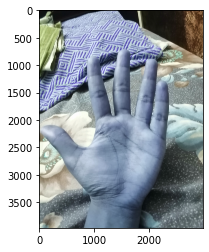

In [57]:
plt.imshow(img)

In [64]:
imgWidth = img.shape[1]
imgHeight = img.shape[0]

aspect_ratio = imgWidth/imgHeight

iHeight = 3500
iWidth = int(((aspect_ratio*iHeight)*8)//8)


In [ ]:
iBlob = cv2.dnn.blobFromImage(img, 1.0 / 255, (iWidth, iHeight),(0, 0, 0), swapRB=False, crop=False)
net.setInput(iBlob)
output = net.forward()

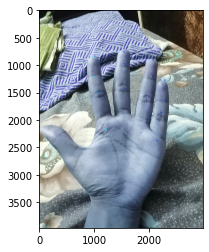

In [61]:
points = []
frameCopy=cv2.imread('myhand2.jpg')
threshold=0.2

for i in range(kpoints):
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (imgWidth, imgHeight))


    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 8, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, lineType=cv2.LINE_AA)

 
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)
        plt.imshow(frameCopy)


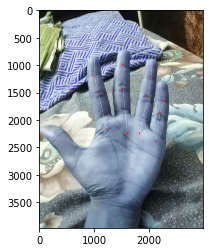

In [63]:
POSE_PAIRS = [ [0,1],[1,2],[2,3],[3,4],[0,5],[5,6],[6,7],[7,8],[0,9],[9,10],[10,11],[11,12],[0,13],[13,14],[14,15],[15,16],[0,17],[17,18],[18,19],[19,20] ]
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(img, points[partA], points[partB], (255, 255, 255), 2)
        cv2.circle(img, points[partA], 8, (255, 0, 0), thickness=10, lineType=cv2.FILLED)

plt.imshow(img)
